In [443]:
#import libraries

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.patches import Arc, Circle, Rectangle
import itertools

from PIL import Image
import time


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools

from sklearn.model_selection import GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

import xgboost as xgb

import seaborn as sns

import pickle

pd.options.mode.chained_assignment = None


In [444]:
# reading in csv file

df = pd.read_csv('csv_files/Final_df.csv', index_col = 0)

In [445]:
# removing the 3 multiposition players as they do not fit into the dataset

df = df[(df['Pos'] != 'PF-SF') & (df['Pos'] != 'SG-PG') & (df['Pos'] != 'SF-SG')]

In [585]:
# taking a look at the value counts

df.Pos.value_counts()

SG    407
PG    365
PF    352
C     352
SF    348
Name: Pos, dtype: int64

# EDA

I am doing some eda to get an idea of what i have in my data and what patterns i might find. Also see if i can find data that may in fact be irrelevant

[Text(0, 0, '0'),
 Text(0, 0, '50000'),
 Text(0, 0, '100000'),
 Text(0, 0, '150000'),
 Text(0, 0, '200000'),
 Text(0, 0, '250000')]

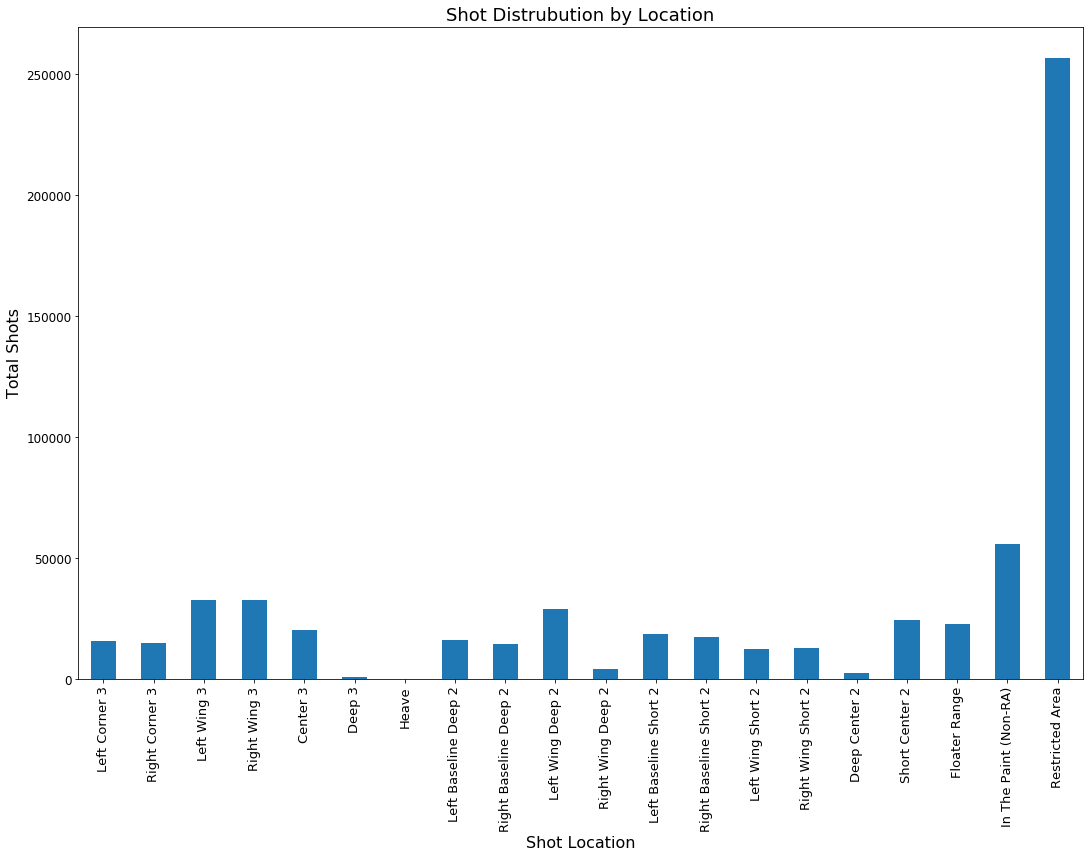

In [447]:
# graph showing the breakdown of the different shot locations

ax = X.sum()[:20].plot.bar(figsize = (18,12))

ax.set_title('Shot Distrubution by Location', fontdict = {'fontsize' : 18})
ax.set_ylabel('Total Shots', fontdict = {'fontsize' : 16})
ax.set_xlabel('Shot Location', fontdict = {'fontsize' : 16})
ax.set_xticklabels(['Left Corner 3', 'Right Corner 3', 'Left Wing 3', 'Right Wing 3', 'Center 3',
'Deep 3', 'Heave', 'Left Baseline Deep 2', 'Right Baseline Deep 2', 'Left Wing Deep 2', 
'Right Wing Deep 2', 'Left Baseline Short 2', 'Right Baseline Short 2', 'Left Wing Short 2',
'Right Wing Short 2', 'Deep Center 2', 'Short Center 2', 'Floater Range', 
'In The Paint (Non-RA)', 'Restricted Area'], fontdict = {'fontsize' : 13})
ax.set_yticklabels([0, 50000, 100000, 150000, 200000, 250000], fontdict = {'fontsize' : 12})

[Text(0, 0, '0'),
 Text(0, 0, '50000'),
 Text(0, 0, '100000'),
 Text(0, 0, '150000'),
 Text(0, 0, '200000'),
 Text(0, 0, '250000')]

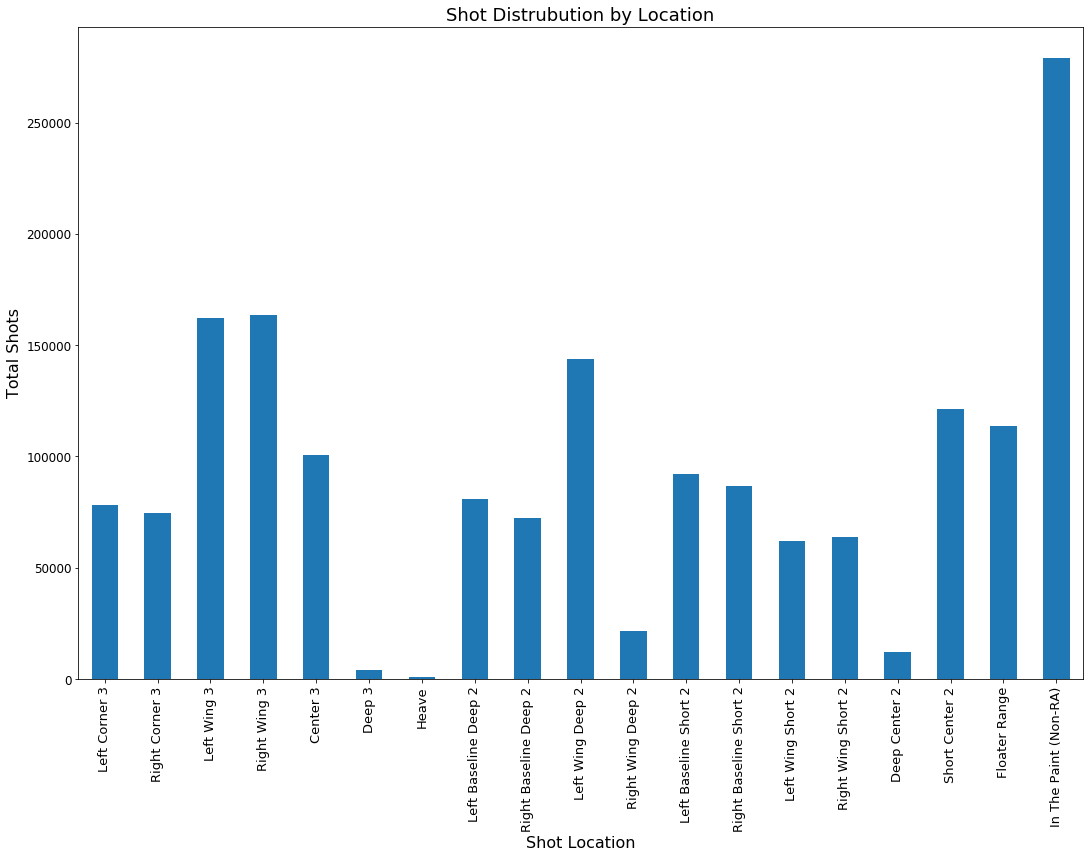

In [448]:
# Same breakdown but not including restricted area which is the large magority of shots

ax2 = X.sum()[:19].plot.bar(figsize = (18,12))

ax2.set_title('Shot Distrubution by Location', fontdict = {'fontsize' : 18})
ax2.set_ylabel('Total Shots', fontdict = {'fontsize' : 16})
ax2.set_xlabel('Shot Location', fontdict = {'fontsize' : 16})
ax2.set_xticklabels(['Left Corner 3', 'Right Corner 3', 'Left Wing 3', 'Right Wing 3', 'Center 3',
'Deep 3', 'Heave', 'Left Baseline Deep 2', 'Right Baseline Deep 2', 'Left Wing Deep 2', 
'Right Wing Deep 2', 'Left Baseline Short 2', 'Right Baseline Short 2', 'Left Wing Short 2',
'Right Wing Short 2', 'Deep Center 2', 'Short Center 2', 'Floater Range', 
'In The Paint (Non-RA)'], fontdict = {'fontsize' : 13})
ax2.set_yticklabels([0, 50000, 100000, 150000, 200000, 250000], fontdict = {'fontsize' : 12})

### Put in the EDA section but need to run the rest of the code first then run this later!!!

In [356]:
df.groupby('new_pos2')['PTS'].plot(kind='hist', histtype='step', bins= 25, figsize=(8,6), legend = True, 
                                   title = 'Point Distribution by Position')


KeyError: 'new_pos2'

In [357]:
df.groupby('new_pos2')['AST'].plot(kind='hist', histtype='step', bins= 25, figsize=(8,6), legend = True, title = 'Assist distribution by position')


KeyError: 'new_pos2'

### Plotting points on a court

In [449]:
# getting the original x, y coordinates for the shots

shot_chart = pd.read_csv('2000-2020_shot_charts.csv')

In [2]:
## http://savvastjortjoglou.com/nba-shot-sharts.html

from mod_5_functions import draw_court

In [521]:
# getting shot charts for 6 different players, 

# 2 guards, 1 star and 1 solid player
# 2 forwards, 1 star and 1 role player
# 2 bigs, 1 star and 1 less proficient big man

Harden = shot_chart[shot_chart.PLAYER_NAME == 'James Harden']
Crawford = shot_chart[shot_chart.PLAYER_NAME == 'Jamal Crawford']

Durant = shot_chart[shot_chart.PLAYER_NAME == 'Kevin Durant']
Tucker = shot_chart[shot_chart.PLAYER_NAME == 'P.J. Tucker'] 

Davis = shot_chart[shot_chart.PLAYER_NAME == 'Anthony Davis']
Deandre = shot_chart[shot_chart.PLAYER_NAME == 'DeAndre Jordan']

lebron = shot_chart[shot_chart.PLAYER_NAME == 'LeBron James']


Plotting for 6 different player types explained earlier

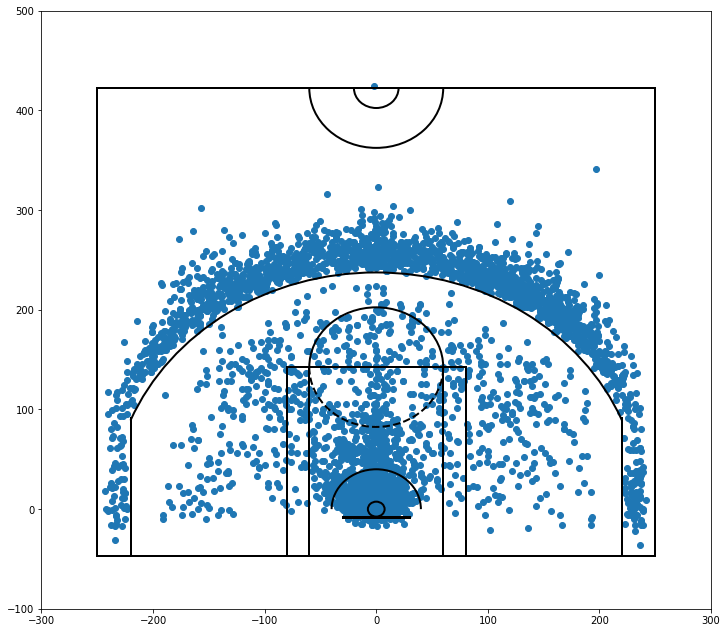

In [452]:
plt.figure(figsize=(12,11))
plt.scatter(Harden.LOC_X, Harden.LOC_Y)
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

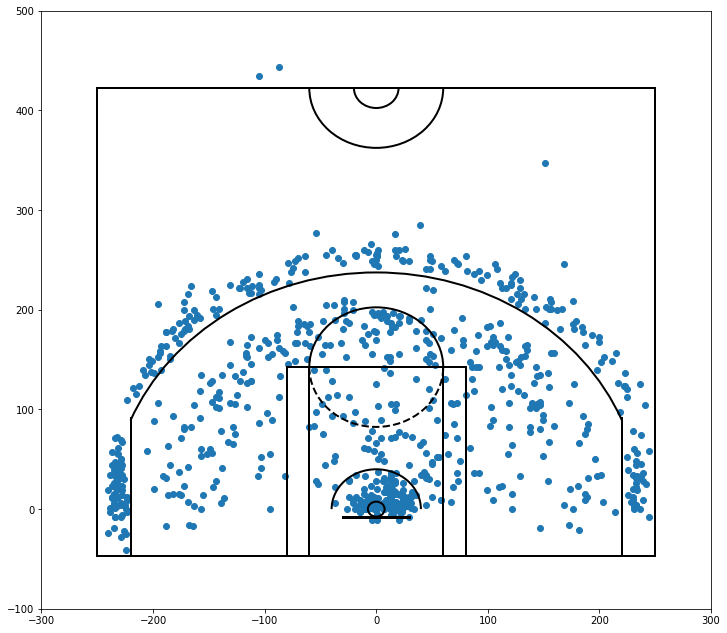

In [453]:
plt.figure(figsize=(12,11))
plt.scatter(Crawford.LOC_X, Crawford.LOC_Y)
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

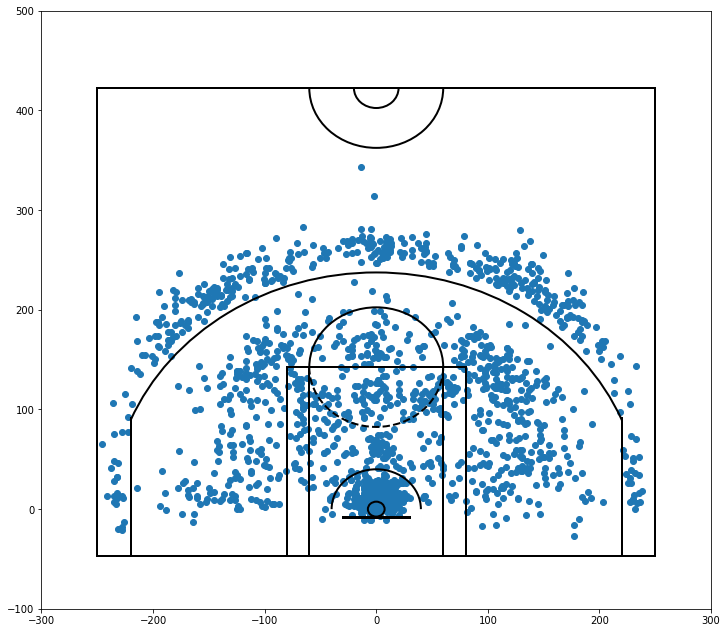

In [454]:
plt.figure(figsize=(12,11))
plt.scatter(Durant.LOC_X, Durant.LOC_Y)
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

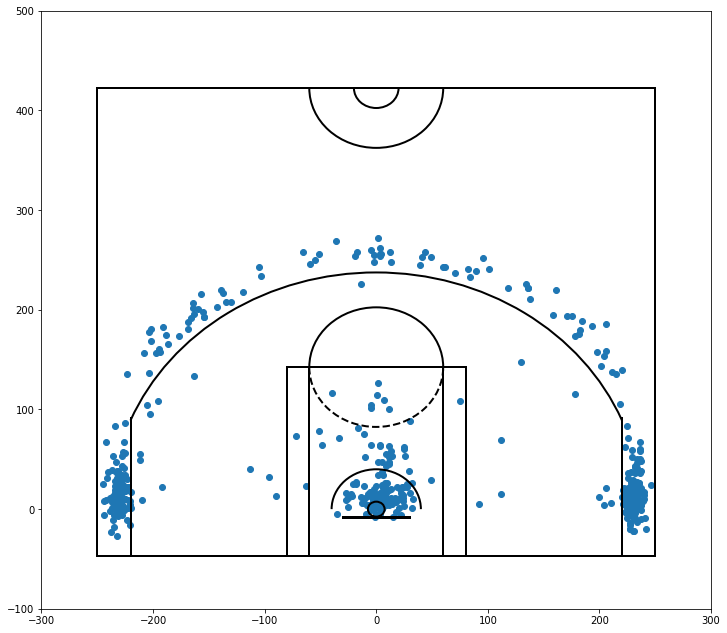

In [455]:
plt.figure(figsize=(12,11))
plt.scatter(Tucker.LOC_X, Tucker.LOC_Y)
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

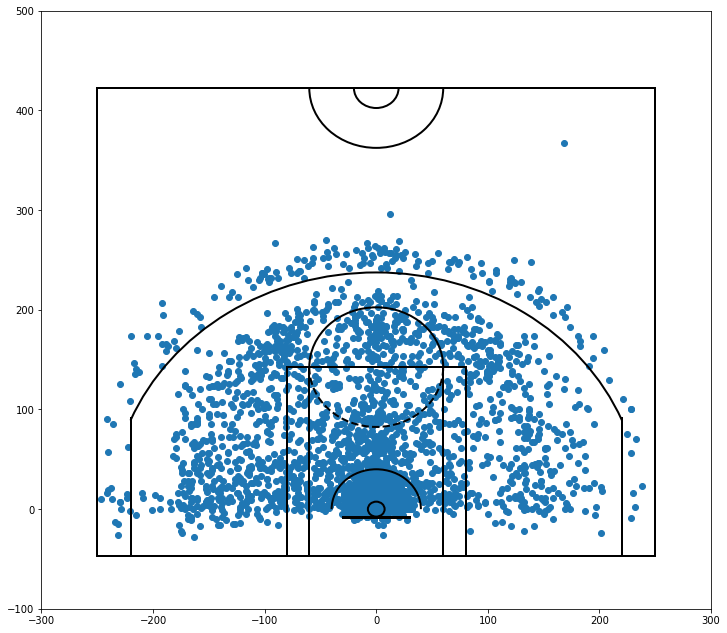

In [456]:
plt.figure(figsize=(12,11))
plt.scatter(Davis.LOC_X, Davis.LOC_Y)
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

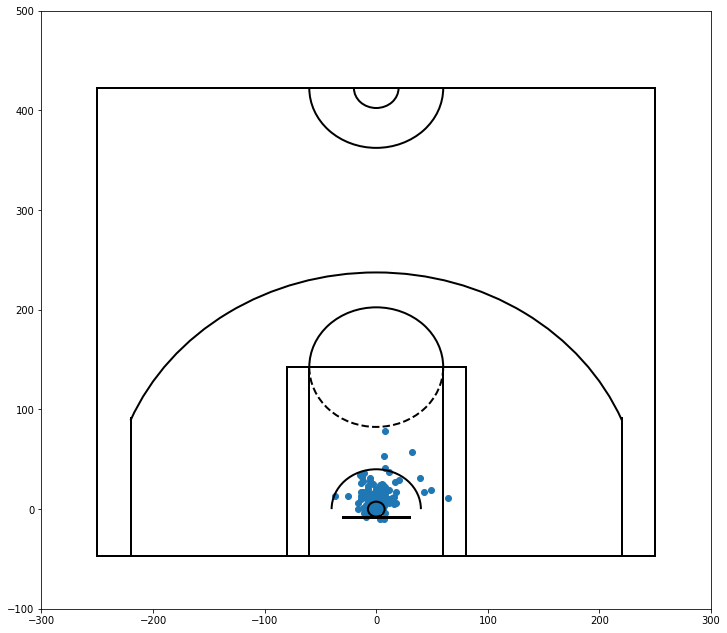

In [457]:
plt.figure(figsize=(12,11))
plt.scatter(Deandre.LOC_X, Deandre.LOC_Y)
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

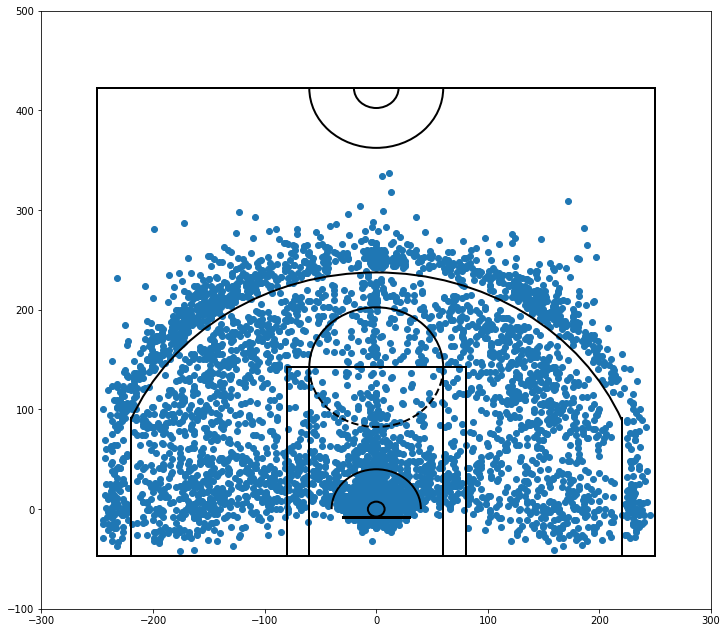

In [522]:
plt.figure(figsize=(12,11))
plt.scatter(lebron.LOC_X, lebron.LOC_Y)
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

# 5 classes

## Train Test Split

In [581]:
# creating the features and the target variables

X = df.drop(columns = ['Player', 'PLAYER_ID', 'Pos'])
y = df.Pos

In [582]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24, test_size = .25) 

## Dummy classifier

#### First run the dummy classifier to get an idea of what the number i need to beat should be, only predicts the dominant class which is about 21% as the 5 classes are all fairly balanced

In [592]:
dummy_clf = DummyClassifier(strategy = 'most_frequent')

In [593]:
dummy_clf.fit(X_train, y_train)

dummy_pred = dummy_clf.predict(X_test)

accuracy_score(dummy_pred, y_test)

0.19956140350877194

# XGB

## XGBoost Model

In [463]:
xgb_clf = xgb.XGBClassifier()

In [464]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [465]:
xgb_pred = xgb_clf.predict(X_test)

accuracy_score(y_test, xgb_pred)

0.5855263157894737

## XGB Gridsearch

In [466]:
param_xgb = {'max_depth' : [4, 6, 8, 10], 'learning_rate' : [.01, .05, .1, .2],
             'n_estimators' : [100, 250, 500], 'min_child_weight' : [1,3,5]}

In [467]:
grid_xgb = GridSearchCV(xgb_clf, param_xgb, n_jobs = -1, cv = 3, verbose = 1)

grid_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
grid_xgb_pred = grid_xgb.best_estimator_.predict(X_test)

accuracy_score(y_test, grid_xgb_pred)

# Random Forest

## Random Forest Model

In [468]:
rf_clf = RandomForestClassifier()

In [594]:
rf_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [469]:
rf_clf.fit(X_train, y_train)

rf_pred = rf_clf.predict(X_test)

accuracy_score(y_test, rf_pred)

0.5592105263157895

## Random Forest gridsearch

In [218]:
param_rfc = {'max_depth': [3, 6, 9, 12, 15], 'n_estimators' : [100, 200, 300, 400, 500], 
              'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 4, 6], 'criterion': ['gini', 'entropy']}

In [219]:
grid_rf = GridSearchCV(rfc_clf, param_rfc, n_jobs = -1, cv = 5, scoring = 'accuracy')

grid_rf.fit(X_train, y_train)

0.5767634854771784

In [260]:
rf_grid_pred = grid_rf.best_estimator_.predict(X_test)

accuracy_score(y_test, rf_grid_pred)

0.5767634854771784

# SVM

## SVC Model - 

#### Need to rerun the model with scaled data

In [470]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = pd.DataFrame(data=scaler.transform(X_train), columns = X.columns)
X_test_scale = pd.DataFrame(data=scaler.transform(X_test), columns = X.columns)

In [471]:
sv_clf = SVC(kernel='linear')

In [595]:
sv_clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [472]:
sv_clf.fit(X_train_scale, y_train)

svc_pred = sv_clf.predict(X_test_scale)

accuracy_score(y_test, svc_pred)

0.6140350877192983

## SVC Gridsearch

In [262]:
param_svc = {'C': [.1, 1, 10, 100], 'gamma': ['auto']}

In [382]:
grid_svc = GridSearchCV(sv_clf, param_svc, refit = True, verbose = 1, n_jobs = -1, cv = 5)

grid_svc.fit(X_train_scale, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
svc_grid_pred = grid_svc.best_estimator_.predict(X_test_scale)

accuracy_score(y_test, svc_grid_pred)

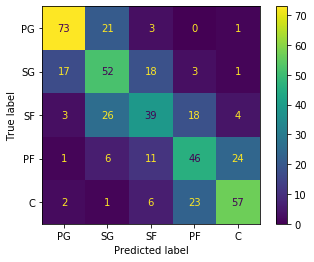

In [473]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

plot_confusion_matrix(xgb_clf, X_test, y_test, labels = ['PG', 'SG', 'SF', 'PF', 'C'])

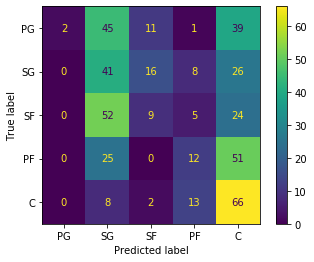

In [474]:
plot_confusion_matrix(sv_clf, X_test, y_test, labels = ['PG', 'SG', 'SF', 'PF', 'C'])

### After taking a look at the confusion matrix i can see that the 2 most mixed up positions are sg and sf and power forward and center. Which makes sense, pg is much different than any other position benefitting from the assist value in the category. But the differences between the 2 wing positions or the 2 bigs do not get the same benefits. 

### So i want to break it down a little bit more and re classify the positions first just using wings for sg and sf


#### ** also note that the svm model, while it does preform well is doing a bad job of actually picking them, mainly just selecting sf which is the middle ground for all the stats

# 4 Class 

### Problem is that the difference between sg and small forwards is too small that they are likely to get miss classified so i want to take the best model and only use 4 classes instead (pg, wing, pf and center)

In [475]:
new_positions = []

for x in df.Pos:
    if (x == 'SG') or (x == 'SF'):
        new_positions.append('Wing')
    else:
        new_positions.append(x)

In [476]:
df['new_pos'] = new_positions

In [477]:
X2 = df.drop(columns = ['Player', 'PLAYER_ID', 'Pos', 'new_pos'])
y2 = df.new_pos

## Train test split

In [478]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 24, test_size = .25) 

In [479]:
scaler2 = StandardScaler()
scaler2.fit(X2_train)
X2_train_scale = pd.DataFrame(data=scaler2.transform(X2_train), columns = X2.columns)
X2_test_scale = pd.DataFrame(data=scaler2.transform(X2_test), columns = X2.columns)

## SVM

In [480]:
sv2_clf = SVC(kernel='rbf', C = 3, class_weight = 'balanced')

In [481]:
sv2_clf.fit(X2_train_scale, y2_train)

svc2_pred = sv2_clf.predict(X2_test_scale)

accuracy_score(y2_test, svc2_pred)

0.7149122807017544

## XGB

In [484]:
rf2_clf = RandomForestClassifier()

In [485]:
rf2_clf.fit(X2_train, y2_train)

rf2_pred = rf2_clf.predict(X2_test)

accuracy_score(y2_test, rf2_pred)

0.6600877192982456

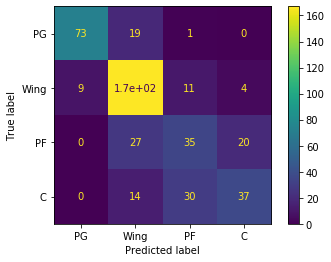

In [415]:
plot_confusion_matrix(rf2_clf, X2_test, y2_test, labels = ['PG', 'Wing', 'PF', 'C'])

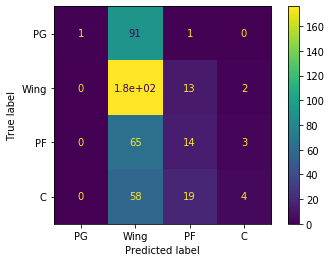

In [416]:
plot_confusion_matrix(sv2_clf, X2_test, y2_test, labels = ['PG', 'Wing', 'PF', 'C'])

### This does a little better but it is still mixing up the bigs at a pretty high rate so i had to dive back in again and change the pf and center to a single big position so values such as paint scoring, rebounds and blocks can have a large affect on the data

#### SVM model still has the highest score but like before it is doing a very bad job of actually classifying, not giving a single prediction to pgs and mostly choosing wings which is the middle ground and now the dominant class

# 3 Classes

## changing from 4 classes to 3 to attempt to do the same thing, since the data is coming from 2000-2020 then combining centers and pfs could easily prove to help the data the same way that sg and sf are since the small ball 4 didnt change until around 2015

In [486]:
new_positions2 = []

for x in df.Pos:
    if (x == 'PF') or (x == 'C'):
        new_positions2.append('Big')
    elif (x == 'SG') or (x == 'SF'):
        new_positions2.append('Wing')
    else:
        new_positions2.append(x)

In [487]:
df['new_pos2'] = new_positions2

In [488]:
X3 = df.drop(columns = ['Player', 'PLAYER_ID', 'Pos', 'new_pos', 'new_pos2'])
y3 = df.new_pos2

## Train test split

In [576]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state = 20, test_size = .25) 

In [577]:
scaler3 = StandardScaler()
scaler3.fit(X3_train)
X3_train_scale = pd.DataFrame(data=scaler3.transform(X3_train), columns = X3.columns)
X3_test_scale = pd.DataFrame(data=scaler3.transform(X3_test), columns = X3.columns)

## Dummy Classifier

In [578]:
dummy_clf2 = DummyClassifier(strategy = 'most_frequent')

dummy_clf2.fit(X3_train, y3_train)

dummy_pred2 = dummy_clf2.predict(X3_test)

accuracy_score(dummy_pred2, y3_test)

0.4407894736842105

## SVM

In [598]:
sv3_clf = SVC(kernel='linear', C = 1, class_weight = None)

In [599]:
sv3_clf.fit(X3_train_scale, y3_train)

svc3_pred = sv3_clf.predict(X3_test_scale)

accuracy_score(y3_test, svc3_pred)

0.8267543859649122

## RF Model

In [641]:
rf3_clf = RandomForestClassifier(class_weight = 'balanced', max_depth = 13)

In [642]:
rf3_clf.fit(X3_train, y3_train)

rf3_pred = rf3_clf.predict(X3_test)

accuracy_score(y3_test, rf3_pred)

0.8070175438596491

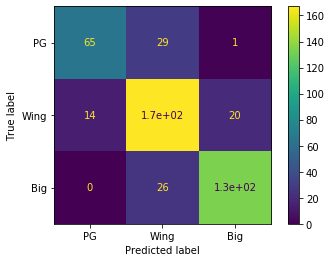

In [602]:
plot_confusion_matrix(rf3_clf, X3_test, y3_test, labels = ['PG', 'Wing', 'Big'])

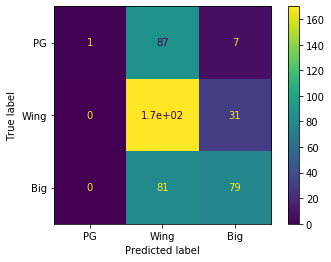

In [538]:
plot_confusion_matrix(sv3_clf, X3_test, y3_test, labels = ['PG', 'Wing', 'Big'])

### Again the scores got much better with the svm model correctly predicting over 80% of the scores and the random forest doing very well in the 76% range. this is the best breakdown of the positions that gives the most clear seperations using box score stats. 

### With this model stats such as assists and above the break 3s have a high influence on the pg category, corner 3s, above the break 3s and mid range shots in general have a high influence on the wings and blocks, rebounds, and paint scoring in general are big influencers for the bigs. so there are clear lines drawn here that can help seperate these 3 classes

#### the svm model again had the highest score but a very lackluster confusion matrix

### Finding Feature importance in svm model

In [539]:
## https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

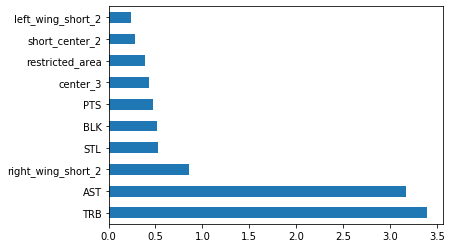

In [540]:
pd.Series(abs(sv3_clf.coef_[0]), index=X3.columns).nlargest(10).plot(kind='barh')

## Only using shot selection with 3 classes

In [499]:
X4 = df.drop(columns = ['Player', 'PLAYER_ID', 'Pos', 'new_pos', 'new_pos2',
                       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF'])
y4 = df.new_pos2

In [541]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state = 20, test_size = .25) 

In [542]:
scaler4 = StandardScaler()
scaler4.fit(X4_train)
X4_train_scale = pd.DataFrame(data=scaler4.transform(X4_train), columns = X4.columns)
X4_test_scale = pd.DataFrame(data=scaler4.transform(X4_test), columns = X4.columns)

## SVM

In [543]:
sv4_clf = SVC(kernel='linear', C = 3, class_weight = None)

In [544]:
sv4_clf.fit(X4_train_scale, y4_train)

svc4_pred = sv4_clf.predict(X4_test_scale)

accuracy_score(y4_test, svc4_pred)

0.618421052631579

## RF Model

In [559]:
rf4_clf = RandomForestClassifier(class_weight='balanced', max_depth = 16)

In [560]:
rf4_clf.fit(X4_train, y4_train)

rf4_pred = rf4_clf.predict(X4_test)

accuracy_score(y4_test, rf4_pred)

0.6578947368421053

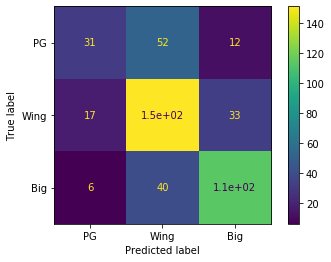

In [547]:
plot_confusion_matrix(rf4_clf, X4_test, y4_test, labels = ['PG', 'Wing', 'Big'])

## Feature importance

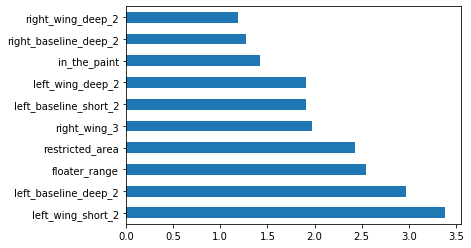

In [438]:
## https://stackoverflow.com/questions/44511636/matplotlib-plot-feature-importance-with-feature-names/49157712

pd.Series(abs(sv4_clf.coef_[0]), index=X4.columns).nlargest(10).plot(kind='barh')

After running all the different models i found that just using shot locations for all the players does not do nearly as good of a job as adding in the box score models but some of the shot locations did affect the data and had a large influence on the data. 

- short right baseline (common shot location for bigs)
- left wing 3 & right wing 3 (common shot for most guards and wings)

- in the pain and restricted area also in the top 5 which are very much big men stats

but overall the features that had the biggest impact were still some of the basic box score stats like blocks, rebounds and assists. Blocks and rebounds being a big man dominant feature and assists being big for guards.

The biggest problem comes with the pgs who without the assist category have shot charts that very closely resemble that of a lot of wing players. So while it did still do an ok job at about 56% not having those basic box score stats hurts this version of the model a little too much

In [528]:
df[df['Player'] == 'Giannis Antetokounmpo']

,Player,PLAYER_ID,left_corner_3,right_corner_3,left_wing_3,right_wing_3,center_3,deep_3,heave,left_baseline_deep_2,...,2P%,TRB,AST,STL,BLK,TOV,PF,PTS,new_pos,new_pos2
637,Giannis Antetokounmpo,203507.0,15.0,16.0,103.0,55.0,105.0,7.0,0.0,45.0,...,0.552571,9.114286,4.385714,1.185714,1.285714,2.8,2.985714,20.5,PF,Big


In [549]:
rf3_clf.predict(df[df['Player'] == 'Nikola Jokic'].drop(columns = ['Player', 'PLAYER_ID', 'Pos', 'new_pos', 'new_pos2']))

array(['Big'], dtype=object)

In [554]:
rf4_clf.predict(df[df['Player'] == 'Dirk Nowitzki'].drop(columns = ['Player', 'PLAYER_ID', 'Pos', 'new_pos', 'new_pos2',
                       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']))

array(['Wing'], dtype=object)